<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Clases/11o13Oct_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


## Naive bayes classifier

In [ ]:
documents = ['Hello, how are you',
              'Win money, win from home',
              'Call me now',
              'Hello, Call hello you tomorrow?']

## countVerctorizer de sklearn
from sklearn.feature_extraction.text import CountVectorizer
count_ = CountVectorizer()
count_.fit(documents)
names = count_.get_feature_names_out()
names

array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [ ]:
count_array = count_.transform(documents).toarray()
count_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [ ]:
freq_df = pd.DataFrame(count_array,columns=names)
freq_df

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


### Detector de spam


In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/2kCy3CN', sep='\t',names=['label','sms_message'])
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['label'] =  df['label'].map({'ham':0,'spam':1})
df.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.sms_message, df.label
                                                    ,random_state=1)
                                                    #,stratify=df.label)

In [ ]:
## Creamos una BoW
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [ ]:
## entrenamos el modelo
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(training_data,y_train)

MultinomialNB()

Accuracy:  0.9885139985642498
precision:  0.9720670391061452
recall:  0.9405405405405406
f1:  0.9560439560439562


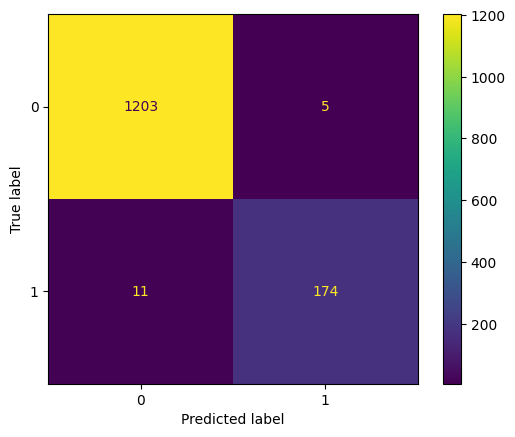

In [ ]:
## predicciones
y_hat = nb.predict(testing_data)

## evaluacion del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

print('Accuracy: ',accuracy_score(y_test,y_hat))
print('precision: ',precision_score(y_test,y_hat))
print('recall: ',recall_score(y_test,y_hat))
print('f1: ',f1_score(y_test,y_hat))

ConfusionMatrixDisplay.from_predictions(y_test,y_hat)